# Zaitsev Anton | Exercise 6

## General Information

In this exercise we will further analyze the Facebook network (**Group 8**). Namely, we will:
1. Randomly choose two sets of nodes in Facebook dataset (each consists of 50 nodes without repetition), calculate the **cut size**, **conductance** between the two sets of nodes and plot the partitioning.
2. Repeat process in **1.** but with different sets of nodes.
3. Generate **Laplacian** matrix of the Facebook network.
4. Identify the list of **cliques** over the entire Facebook network.

In [23]:
# imports
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from typing import List

In [2]:
# global variables
DATA_FOLDER = "../data/"

In [3]:
# utilities
def construct_graph(edges_path: str, directed: bool = False) -> nx.Graph:
    """
    Construct a graph from an edge list.

    Parameters:
        - edges_path (str): The path to the .edges file, which contains the edges of the graph.
        - directed (bool): If True, the graph will be treated as directed, creating a NetworkX DiGraph.
    
    Returns:
        - g (nx.Graph or nx.DiGraph): A NetworkX graph containing all the nodes and edges from the .edges file.
                                      Additionally, nodes present in the .feat file but missing in the .edges
                                      file will be added to the graph as disconnected nodes (without any edges).
    """
    # read graph from .edges file
    if directed:
        g = nx.read_edgelist(edges_path, create_using=nx.DiGraph(), nodetype=int)
    else:
        g = nx.read_edgelist(edges_path, create_using=nx.Graph(), nodetype=int)
    return g

In [4]:
# load facebook network, indirected graph
G_fb = construct_graph(edges_path=f"{DATA_FOLDER}3437.edges", directed=False)

## Question **a**

In [72]:
def analyzeRandomPartition(G: nx.Graph, num_nodes: int = 50, shift_distance: int = 2.5) -> None:
    """
    Randomly partitions a graph into two sets of nodes, calculates cut size and conductance, and plots the partitioned graph.

    Parameters:
        - G (networkx.Graph): The Facebook network graph.
        - num_nodes (int, optional): The number of nodes to include in each random partition.
        - shift_distance (int, optional): Distance to shift the groups apart.
    """
    # step 1: choose 2 sets of num_nodes random nodes each
    nodes = np.array(G.nodes())
    random_nodes_1 = np.random.choice(a=nodes, size=num_nodes, replace=False)
    random_nodes_2 = np.random.choice(a=nodes, size=num_nodes, replace=False)
    # step 2: calculate cut
    cut_size = nx.cut_size(G, random_nodes_1, random_nodes_2)
    # step 3: calculate conductance
    conductance = nx.conductance(G, random_nodes_1, random_nodes_2)
    # step 4: plot the graph with the two partitions highlighted
    # move groups on the plot further away from each other
    pos = nx.spring_layout(G, k=0.4, seed=42)
    for node in random_nodes_1:
        pos[node] = (pos[node][0] - shift_distance, pos[node][1])  # shift group 1 to the left
    for node in random_nodes_2:
        pos[node] = (pos[node][0] + shift_distance, pos[node][1])  # shift group 2 to the right
    # color groups differently
    color_map = []
    for node in G:
        if node in random_nodes_1:
            color_map.append("blue")
        elif node in random_nodes_2:
            color_map.append("green")
        else:
            color_map.append("gray")
    plt.figure(figsize=(20, 8))
    nx.draw_networkx_nodes(G, pos, node_color=color_map, node_size=100, edgecolors="black", linewidths=1)
    nx.draw_networkx_edges(G, pos, edge_color="gray", alpha=0.3)
    plt.text(0.03, 0.95, f"Cut Size: {cut_size}", fontsize=10, ha="left", va="top", transform=plt.gca().transAxes, bbox=dict(facecolor="white", alpha=0.5))
    plt.text(0.03, 0.85, f"Conductance: {conductance:.4f}", fontsize=10, ha="left", va="top", transform=plt.gca().transAxes, bbox=dict(facecolor="white", alpha=0.5))
    plt.title("Partitioning of the Facebook Network into Two Random Sets", fontsize=16, fontweight="bold")
    plt.show()

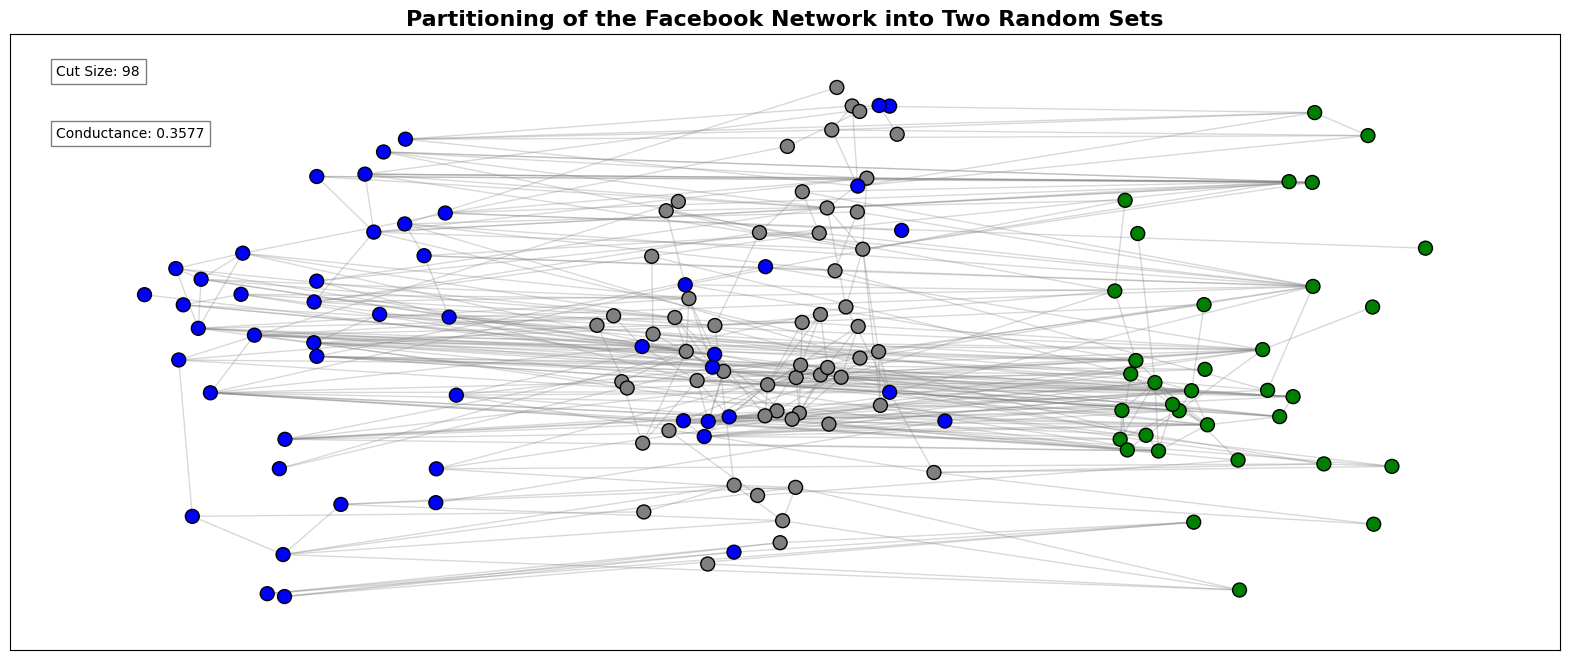

In [73]:
analyzeRandomPartition(G=G_fb)

## Question **b**

In [64]:
def analyzeRandomPartitionsGrid(G: nx.Graph, num_nodes: int = 50, shift_distance: int = 2.5, grid_size: int = 5) -> List[float]:
    """
    Randomly partitions a graph into two sets of nodes grid_size*grid_size times, 
        calculates cut size and conductance, 
        and plots the partitioned graphs in a 5x5 grid.

    Parameters:
        - G (networkx.Graph): The Facebook network graph.
        - num_nodes (int, optional): The number of nodes to include in each random partition.
        - shift_distance (int, optional): Distance to shift the groups apart.
        - grid_size (int, optional): The size of the grid.
    
    Returns: 
        - List [float]: List containing:
            - average_cut (float): Average cut size.
            - average_conductance (float): Average conductance.
    """
    fig, axes = plt.subplots(grid_size, grid_size, figsize=(15, 15))
    axes = axes.flatten()

    average_cut_size = 0
    average_conductance = 0

    for i in range(grid_size*grid_size):
        ax = axes[i]
        # step 1: randomly choose two sets of nodes
        nodes = np.array(G.nodes())
        random_nodes_1 = np.random.choice(a=nodes, size=num_nodes, replace=False)
        random_nodes_2 = np.random.choice(a=nodes, size=num_nodes, replace=False)
        # step 2: calculate cut size
        cut_size = nx.cut_size(G, random_nodes_1, random_nodes_2)
        average_cut_size += cut_size
        # step 3: calculate conductance
        conductance = nx.conductance(G, random_nodes_1, random_nodes_2)
        average_conductance += conductance
        # step 4:  plot the graph in the subplot
        # shift the groups apart
        pos = nx.spring_layout(G, k=0.4, seed=42)  # initial spring layout for positioning
        for node in random_nodes_1:
            pos[node] = (pos[node][0] - shift_distance, pos[node][1])  # shift group 1 to the left
        for node in random_nodes_2:
            pos[node] = (pos[node][0] + shift_distance, pos[node][1])  # shift group 2 to the right
        # each group different color
        color_map = []
        for node in G:
            if node in random_nodes_1:
                color_map.append("blue")
            elif node in random_nodes_2:
                color_map.append("green")
            else:
                color_map.append("gray")
        nx.draw_networkx_nodes(G, pos, node_color=color_map, node_size=25, edgecolors="black", linewidths=1, ax=ax)
        nx.draw_networkx_edges(G, pos, edge_color="gray", alpha=0.3, ax=ax)
        ax.text(0.03, 0.95, f"Cut Size: {cut_size}", fontsize=8, ha="left", va="top",
                transform=ax.transAxes, bbox=dict(facecolor="white", alpha=0.5))
        ax.text(0.03, 0.85, f"Conductance: {conductance:.4f}", fontsize=8, ha="left", va="top",
                transform=ax.transAxes, bbox=dict(facecolor="white", alpha=0.5))
        ax.set_title(f"Partition {i+1}", fontsize=10, fontweight="heavy")
        ax.set_xticks([])
        ax.set_yticks([])
    plt.suptitle("Random Partitioning of the Facebook Network (5x5 Grid)", fontsize=20, fontweight="bold")
    plt.tight_layout()
    plt.subplots_adjust(top=0.92)
    plt.show()
    # step 5: calculate and return average_cut_size and average_conductance
    return [average_cut_size / (grid_size*grid_size), average_conductance / (grid_size*grid_size)]

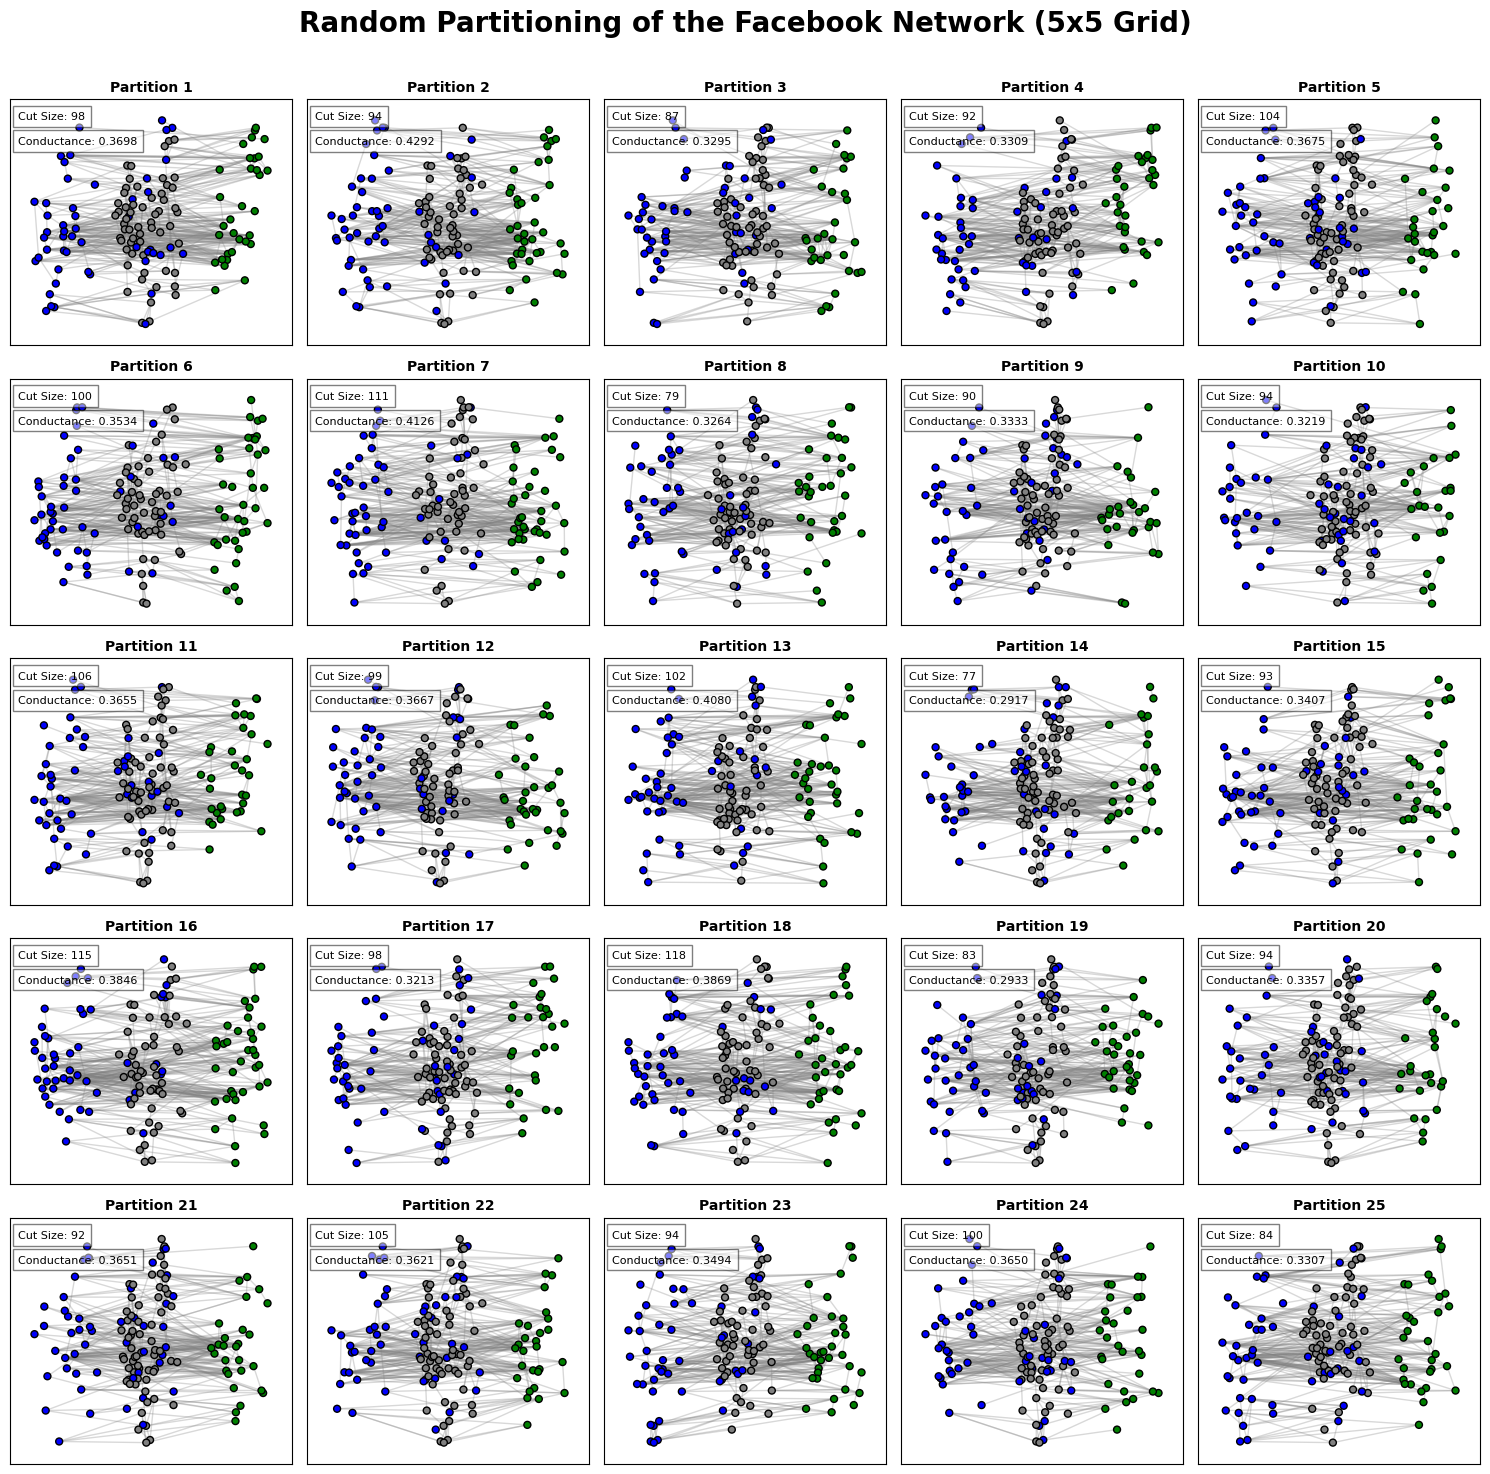

Average cut size: 96.36
Average conductance: 0.354


In [65]:
average_cut_size, average_conductance = analyzeRandomPartitionsGrid(G=G_fb)
print(f"Average cut size: {round(average_cut_size, 3)}")
print(f"Average conductance: {round(average_conductance, 3)}")

Our partition of the Facebook network has $140$ nodes. When we generate $2$ random partitions of the newtork $25$ times, we get that on average the cut size is $96.36$ and average conductance is $0.354$. This is similar to the result when we generate $2$ random partitions of the newtork just $1$ time. The cut size is $98$ and the conductance is $0.3577$. This means that the Facebook network is well-connected, meaning it is difficult to cleanly separate the network into distinct clusters. Most nodes are connected to many others, so regardless of how the nodes are randomly partitioned, the cut size and conductance remain relatively stable. This indicates that the graph exhibits properties of strong global connectivity.

## Question **c**

In [71]:
laplacian = nx.laplacian_matrix(G=G_fb)
df_laplacian = pd.DataFrame(laplacian.todense())
df_laplacian

,0,1,2,3,4,5,6,7,8,9,...,130,131,132,133,134,135,136,137,138,139
0,5,-1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-1,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,7,-1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,-1,12,0,0,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,5,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,-1,0,0,0
136,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,-1,1,0,0,0
137,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
138,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,0


## Question **d**

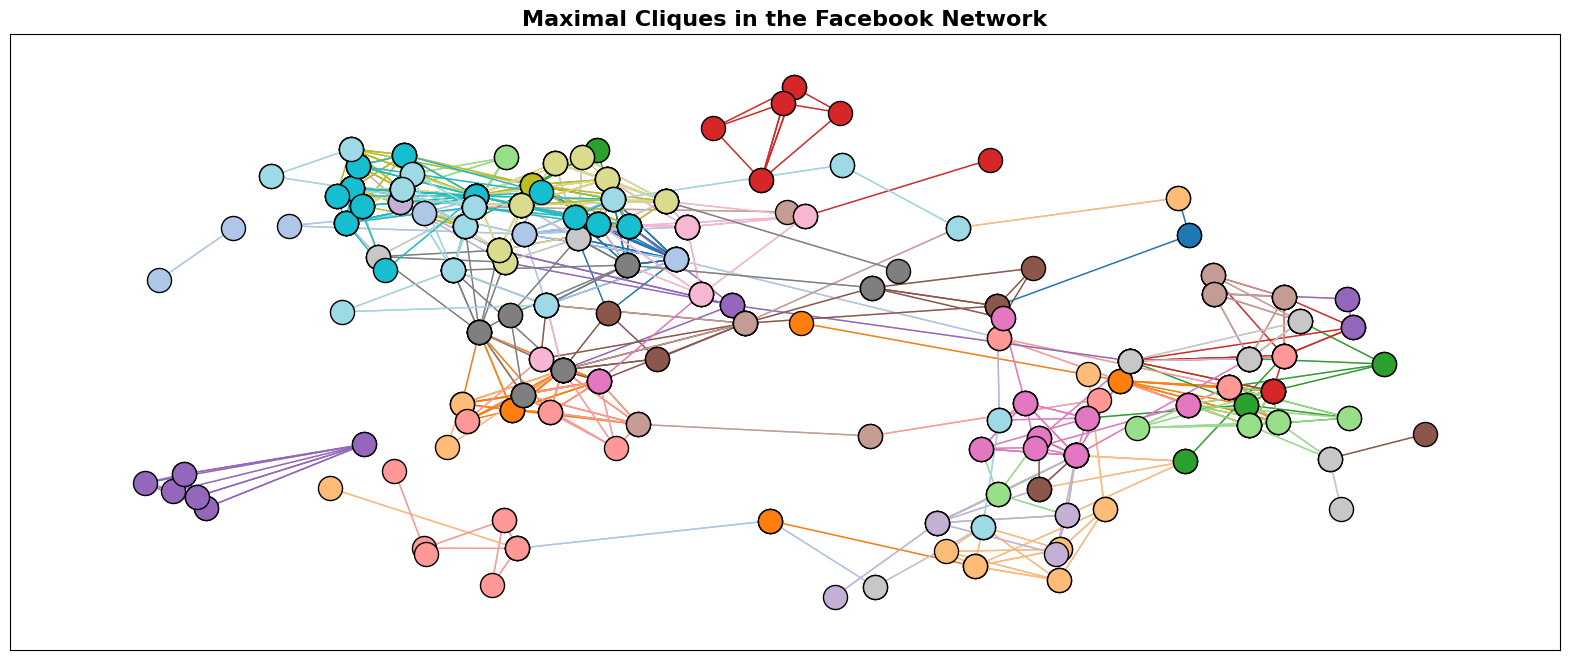

In [56]:
# find cliques
cliques = list(nx.find_cliques(G_fb))
# create a color map for the cliques
cmap = plt.colormaps["tab20"]
colors = [cmap(i / len(cliques)) for i in range(len(cliques))]
# plot the network with cliques highlighted
plt.figure(figsize=(20, 8))
pos = nx.spring_layout(G_fb, k=0.3)
nx.draw_networkx_edges(G_fb, pos, alpha=0.5, edge_color="gray")
# highlight each clique with a different color
for i, clique in enumerate(cliques):
    clique_color = colors[i]
    nx.draw_networkx_nodes(G_fb, pos, nodelist=clique, node_color=[clique_color], node_size=300, edgecolors="black", linewidths=1)
    nx.draw_networkx_edges(G_fb, pos, edgelist=list(itertools.combinations(clique, 2)), edge_color=[clique_color], width=1)
plt.title("Maximal Cliques in the Facebook Network", fontsize=16, fontweight="bold")
plt.show()
